### Task 1. Graph generating

In [15]:
import numpy as np

num_vertices = 100
num_edges = 200

adj_matrix = np.zeros((num_vertices, num_vertices))
edges_generated = 0

while edges_generated < num_edges:
    i, j = np.random.randint(0, num_vertices, 2)
    if i != j and adj_matrix[i][j] == 0:
        adj_matrix[i][j] = 1
        adj_matrix[j][i] = 1
        edges_generated += 1

print("Random Adjacency Matrix:")
print(adj_matrix)
assert np.array_equal(adj_matrix, adj_matrix.T)

Random Adjacency Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


In [3]:
adj_list = {i: [] for i in range(num_vertices)}
for i in range(num_vertices):
    for j in range(num_vertices):
        if adj_matrix[i][j] == 1:
            adj_list[i].append(j)

print("\nAdjacency List:")
print(adj_list)



Adjacency List:
{0: [6, 48, 50, 59, 74], 1: [17, 77], 2: [24, 35, 59, 61, 85], 3: [83], 4: [7, 62, 67, 71, 96], 5: [23, 45, 59], 6: [0, 61, 86, 91], 7: [4, 27, 71], 8: [36, 45, 56, 63, 70], 9: [23, 29, 44, 51, 56, 96], 10: [31, 55, 68, 72, 82, 86], 11: [27, 55, 60], 12: [20, 31, 36, 43, 78, 84], 13: [33, 73], 14: [28, 34, 51, 59], 15: [30, 80, 84], 16: [44, 51, 91], 17: [1, 38, 40, 56, 67, 72, 79], 18: [25, 43, 63, 73], 19: [], 20: [12, 26, 43, 44, 73, 81], 21: [45, 51, 80], 22: [88, 95], 23: [5, 9, 31, 63, 93], 24: [2, 38, 68], 25: [18, 34, 55, 66, 95], 26: [20], 27: [7, 11, 40], 28: [14, 30, 42, 61, 72, 83], 29: [9, 35, 61], 30: [15, 28, 56, 59, 95, 96], 31: [10, 12, 23, 48, 54, 62], 32: [90, 91], 33: [13, 50, 62, 81, 98], 34: [14, 25, 48, 65, 66, 72, 75, 89], 35: [2, 29, 51, 58, 82], 36: [8, 12, 39, 98], 37: [], 38: [17, 24, 57, 77, 81], 39: [36, 97, 99], 40: [17, 27, 43, 48, 64, 73, 74], 41: [71], 42: [28, 87, 93, 96], 43: [12, 18, 20, 40, 59, 91], 44: [9, 16, 20], 45: [5, 8, 21, 

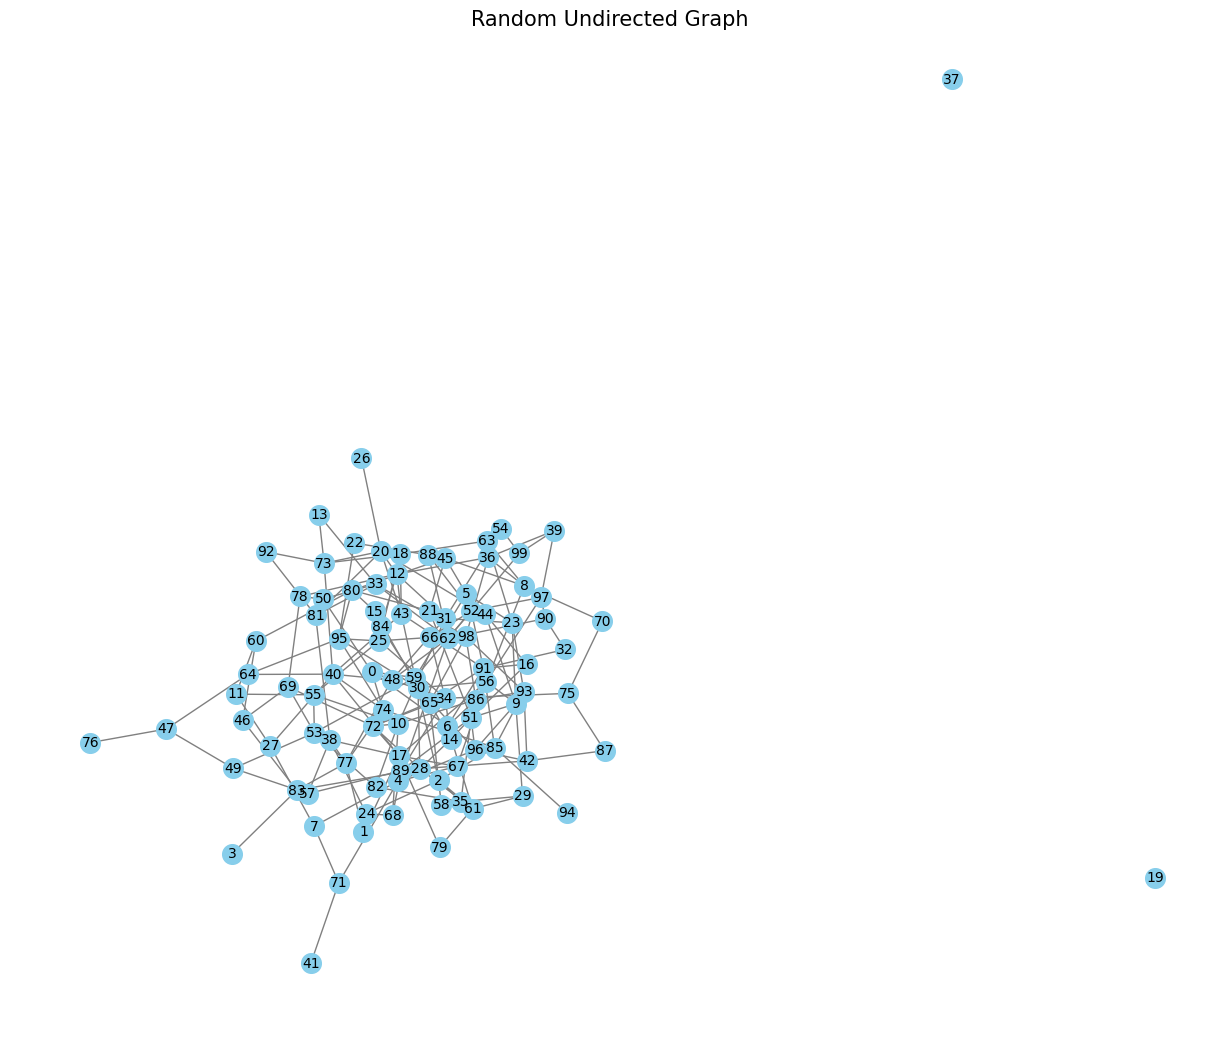

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph(adj_matrix)
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)  # Using spring layout for better visualization
nx.draw(G, pos, with_labels=True, node_size=200, font_size=10, node_color='skyblue', edge_color='gray')
plt.title("Random Undirected Graph", fontsize=15)
plt.show()


In [5]:
print("Partial Adjacency Matrix:")
print(adj_matrix[:5, :5])  # Print the first 5x5 submatrix

print("\nPartial Adjacency List:")
for vertex in range(5):
    print(f"{vertex}: {adj_list[vertex]}")


Partial Adjacency Matrix:
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

Partial Adjacency List:
0: [6, 48, 50, 59, 74]
1: [17, 77]
2: [24, 35, 59, 61, 85]
3: [83]
4: [7, 62, 67, 71, 96]


Both adjacency matrix and adjacency list representations have their own advantages and are suited for different purposes. Here's a breakdown of their conveniences for different use cases:

Adjacency Matrix:
- Edge Existence Queries: Adjacency matrices are efficient for checking whether an edge exists between two vertices. It's a constant time operation (O(1)) to check if an edge exists or not.
- Space Efficiency for Dense Graphs: For dense graphs (where the number of edges is close to the maximum possible edges), adjacency matrices are memory efficient as they use O(V^2) space, where V is the number of vertices.
- Graph Operations: Matrix operations can be performed on adjacency matrices. This is useful for certain algorithms and computations.

Adjacency List:
- Memory Efficiency for Sparse Graphs: For sparse graphs (where the number of edges is significantly less than the maximum possible edges), adjacency lists are memory efficient. They use O(V + E) space, where V is the number of vertices and E is the number of edges.
- Iterating Over Neighbors: Adjacency lists are convenient for iterating over the neighbors of a specific vertex. It takes O(degree) time, where degree is the number of neighbors of the vertex.
- Dynamic Graphs: Adjacency lists are well-suited for dynamic graphs where edges are frequently added or removed. Modifying an adjacency list to add or remove an edge takes linear time in the worst case.


Use Cases:
- Adjacency Matrix: Use when you need constant time edge existence checks, and the graph is dense or when you need to perform matrix operations on the graph.
- Adjacency List: Use when memory efficiency is crucial, especially for sparse graphs. Also, use adjacency lists when you need to iterate over neighbors frequently or when dealing with dynamic graphs.

### Task 2. DFS and BFS

#### 2.1. Connected components

In [7]:
def dfs(node, visited, adj_list, component):
    visited[node] = True
    component.append(node)
    for neighbor in adj_list[node]:
        if not visited[neighbor]:
            dfs(neighbor, visited, adj_list, component)

def find_connected_components(adj_list):
    visited = [False] * len(adj_list)
    components = []
    for node in range(len(adj_list)):
        if not visited[node]:
            component = []
            dfs(node, visited, adj_list, component)
            components.append(component)
    return components

connected_components = find_connected_components(adj_list)
print("\nConnected Components:")
print(connected_components)



Connected Components:
[[0, 6, 61, 2, 24, 38, 17, 1, 77, 48, 31, 10, 55, 11, 27, 7, 4, 62, 33, 13, 73, 18, 25, 34, 14, 28, 30, 15, 80, 21, 45, 5, 23, 9, 29, 35, 51, 16, 44, 20, 12, 36, 8, 56, 67, 97, 39, 99, 54, 63, 52, 59, 43, 40, 64, 47, 49, 53, 69, 46, 60, 83, 3, 72, 65, 58, 84, 91, 32, 90, 85, 74, 95, 22, 88, 93, 42, 87, 75, 70, 96, 86, 98, 94, 78, 50, 82, 57, 89, 68, 76, 66, 26, 81, 92, 71, 41, 79], [19], [37]]


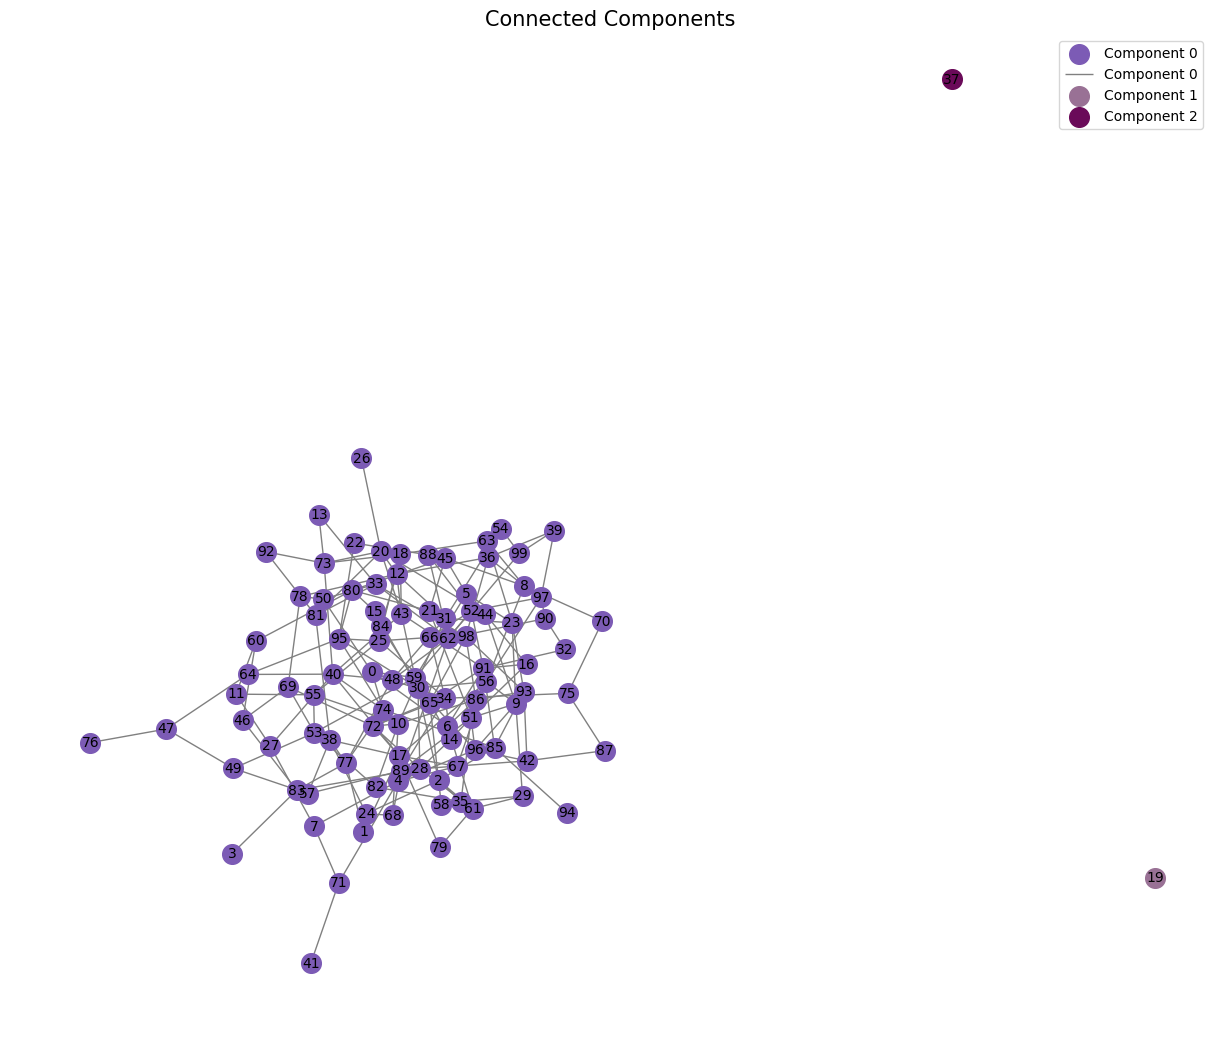

In [9]:
import random

# Generate random colors for each connected component
colors = ['#' + '%06X' % random.randint(0, 0xFFFFFF) for _ in range(len(connected_components))]

plt.figure(figsize=(12, 10))
for idx, component in enumerate(connected_components):
    subgraph = G.subgraph(component)
    nx.draw(subgraph, pos, with_labels=True, node_size=200, font_size=10, node_color=colors[idx], edge_color='gray', label=f"Component {idx}")

plt.title("Connected Components", fontsize=15)
plt.legend()
plt.show()


DFS explores the graph depth-first, ensuring it comprehensively covers all vertices reachable from the starting point. In a graph with a large number of edges, it is likely to encounter a situation where there is a major connected component encompassing most of the vertices, with a few isolated vertices forming smaller components. Due to its depth-first nature, DFS thoroughly traverses these large connected regions before exploring isolated vertices, ensuring it correctly identifies the major connected components and isolated vertices.

#### 2.2. Shortest path

In [8]:
from random import randint
from collections import deque

# Generate random start and end vertices
start_vertex = randint(0, num_vertices - 1)
end_vertex = randint(0, num_vertices - 1)
while start_vertex == end_vertex:
    end_vertex = randint(0, num_vertices - 1)

def bfs_shortest_path(adj_list, start, end):
    visited = [False] * len(adj_list)
    queue = deque([(start, [start])])
    while queue:
        node, path = queue.popleft()
        if node == end:
            return path
        if not visited[node]:
            visited[node] = True
            for neighbor in adj_list[node]:
                queue.append((neighbor, path + [neighbor]))
    return None

shortest_path = bfs_shortest_path(adj_list, start_vertex, end_vertex)

print(f"Randomly chosen start vertex: {start_vertex}")
print(f"Randomly chosen end vertex: {end_vertex}")
print(f"Shortest Path from {start_vertex} to {end_vertex}:")
print(shortest_path)


Randomly chosen start vertex: 78
Randomly chosen end vertex: 3
Shortest Path from 78 to 3:
[78, 69, 46, 83, 3]


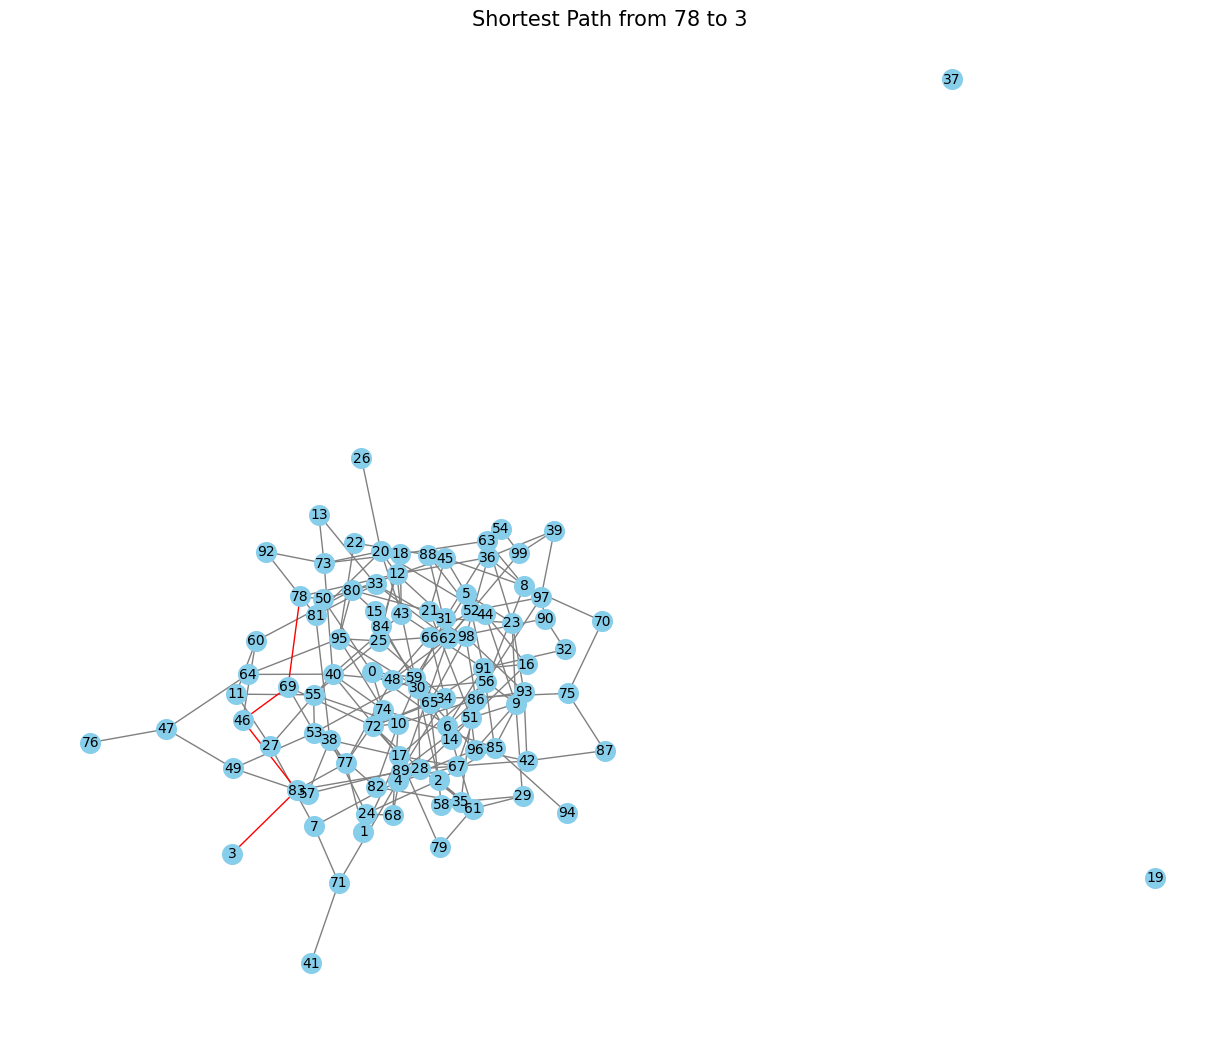

In [10]:
# Highlight shortest path edges in red color
edge_colors = ['red' if (u, v) in zip(shortest_path, shortest_path[1:]) or (v, u) in zip(shortest_path, shortest_path[1:]) else 'gray' for u, v in G.edges()]

plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, node_size=200, font_size=10, node_color='skyblue', edge_color=edge_colors)
plt.title(f"Shortest Path from {start_vertex} to {end_vertex}", fontsize=15)
plt.show()


BFS, being a breadth-first search algorithm, guarantees finding the shortest path in an unweighted graph. When applied to the graph, it efficiently explores vertices level by level, ensuring the shortest path is found between the given start and end vertices. The visualization accurately reflects this shortest path, as the BFS algorithm systematically explores edges in layers, highlighting the shortest route on the graph visualization.

### Part 3. 

1. Adjacency Matrix: An adjacency matrix is a 2D array used to represent the connections between vertices. If there is an edge between vertices i and j, adj_matrix[i][j] is set to 1; otherwise, it is 0. This data structure is memory-intensive for large graphs but offers constant time edge existence checks (O(1)).
2. Adjacency List: An adjacency list is a collection of lists or dictionaries, where each vertex v has a list of its neighboring vertices. This structure is memory-efficient for sparse graphs, utilizing O(V + E) space where V is the number of vertices and E is the number of edges. It is beneficial for iterating over neighbors and dynamic graph operations.
3. DFS (Depth-First Search) : DFS is a graph traversal algorithm that explores as far as possible along each branch before backtracking. It uses a recursive approach or a stack to keep track of visited vertices and explore the graph's connected components. It ensures comprehensive coverage of the graph, identifying all connected components. Recursion is employed to implement the DFS algorithm, allowing the algorithm to explore deeply into the graph, marking visited vertices and forming connected components.

4. BFS (Breadth-First Search): BFS is another graph traversal algorithm that explores all the vertices of the graph in breadth-first manner, visiting all neighbors of a vertex before moving to the next level neighbors. It ensures finding the shortest path in unweighted graphs. A queue data structure is used to implement BFS. Starting from the source vertex, vertices are enqueued and dequeued systematically, ensuring that shorter paths are explored first, leading to the discovery of the shortest path.